<hr/>
<h1><center> Data Modelling - Phnom Penh</center></h1>
<hr/>

***

### Data Description

1. Date
2. Time 
3. Water Content (m3/m3)
4. Solar Radiation (W/m2)
5. Rain (mm)
6. Temperature (Celcuis)
7. RH (%)
8. Wind Speed (m/s)
9. Gust Speed (m/s)
10. Wind Direction (Degree)
11. Dew Point (Celcuis)

# Import Packages
***

In [28]:
# importing the required modules
import glob
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from datetime import datetime, date 

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# Read the Data
***

In [29]:
# specifying the path to csv files
# change ur directory here based on pwd

path = "/Users/votanasrey/Documents/Term10/ProjectII/Cambodia_Weather_Forcasting_Prediction_With_Time_Series/datasets/intermediate_layer/phnom_penh"

# csv files in the path
data = pd.read_csv(path + "/cleaned_dataset_phnom_penh.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
0,20/11/01,00:00:00,0.3062,1,0.0,26.84,94.8,0.3,1.0,152.0,25.97
1,20/11/01,00:05:00,0.3066,1,0.0,26.77,94.7,0.0,1.0,152.0,25.88
2,20/11/01,00:10:00,0.3066,1,0.0,26.72,94.7,0.3,1.3,154.0,25.83
3,20/11/01,00:15:00,0.3066,1,0.0,26.65,94.6,0.0,0.0,152.0,25.74
4,20/11/01,00:20:00,0.3066,1,0.0,26.55,94.7,0.0,0.0,152.0,25.66


# Data Quality Checking
***

In [30]:
#check the data missing 
data.isnull().any()

date               False
time               False
water_content      False
solar_radiation    False
rain               False
temperature        False
rh                 False
wind_speed         False
gust_speed         False
wind_direction     False
dew_point          False
dtype: bool

In [31]:
#sum it if it has any
data.isnull().sum()

date               0
time               0
water_content      0
solar_radiation    0
rain               0
temperature        0
rh                 0
wind_speed         0
gust_speed         0
wind_direction     0
dew_point          0
dtype: int64

In [32]:
#list all the columns which has in dataset 
for i,j in enumerate(data.columns):
    print(i, " ", j)

0   date
1   time
2   water_content
3   solar_radiation
4   rain
5   temperature
6   rh
7   wind_speed
8   gust_speed
9   wind_direction
10   dew_point


In [41]:
#check the number of columns and rows in dataframe
print("Number of rows in dataframe: ", data.shape[0])
print("**"*50)
print("Number of columns in dataframe: ", data.shape[1])

Number of rows in dataframe:  135665
****************************************************************************************************
Number of columns in dataframe:  11


In [33]:
#checking all datatype in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135665 entries, 0 to 135664
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             135665 non-null  object 
 1   time             135665 non-null  object 
 2   water_content    135665 non-null  float64
 3   solar_radiation  135665 non-null  int64  
 4   rain             135665 non-null  float64
 5   temperature      135665 non-null  float64
 6   rh               135665 non-null  float64
 7   wind_speed       135665 non-null  float64
 8   gust_speed       135665 non-null  float64
 9   wind_direction   135665 non-null  float64
 10  dew_point        135665 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 11.4+ MB


# Data Wrangling | Cleansing
***

In [82]:
#select only number features
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
numeric_features

['water_content',
 'solar_radiation',
 'rain',
 'temperature',
 'rh',
 'wind_speed',
 'gust_speed',
 'wind_direction',
 'dew_point',
 'temperature_zscore']

In [52]:
#select only positive of numeric features in dataframe

for i in numeric_features:
    data = data[data[i] > 0 ]

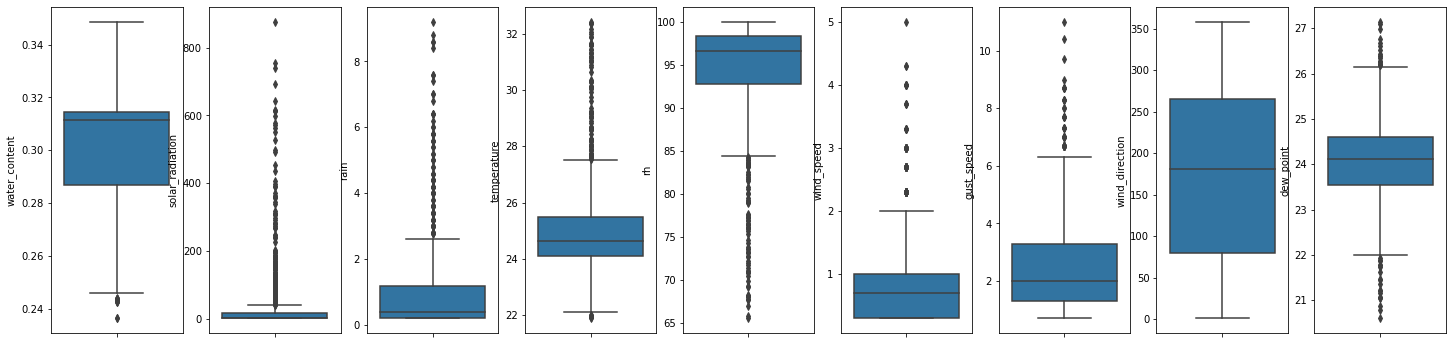

In [75]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=9, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])
sns.boxplot(y=data['rh'], ax=axes[4])
sns.boxplot(y=data['wind_speed'], ax=axes[5])
sns.boxplot(y=data['gust_speed'], ax=axes[6])
sns.boxplot(y=data['wind_direction'], ax=axes[7])
sns.boxplot(y=data['dew_point'], ax=axes[8])

print()
plt.show()

In [76]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
data['temperature_zscore'] = zscore(data.temperature)

#define zscore.
#Z score is in (-3,3) value, if it's out means that it has outlier
data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)]
#drop z_score
data = data.drop(data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)].index)

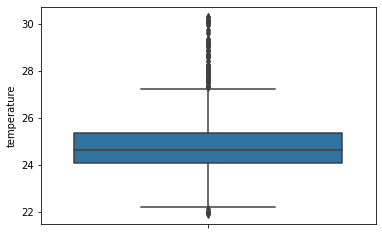

In [77]:
#plot the temperature parameter in dataframe for testing 
sns.boxplot(y=data['temperature'])
plt.show()

# Exploratory Data Analysis
***

In [78]:
#create a function for line plot 
def line_plot(x, y, title):
    plt.figure(figsize=(25,6))
    sns.lineplot(x=x, y=y)
    plt.title(title, fontweight='bold', fontsize=15)
    plt.show()

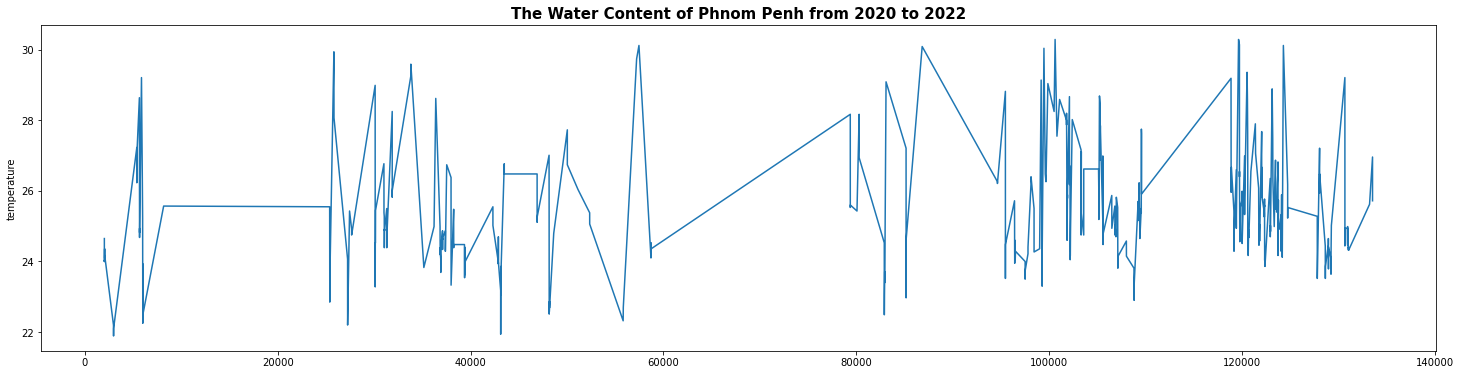

In [79]:
#draw a testing line plot
line_plot(data.date.index, data.temperature, "The Water Content of Phnom Penh from 2020 to 2022")